# World Bank's World Development Indicators vs. Environment Analysis - Analysis Notebook

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [49]:
%run ./help_funcs.ipynb

## Load the datasets

Climate Change/Pollution Indicators

| Dataset | Series Code | Series Description/Name |
| --- | --- | --- |
|CO2| EN.ATM.CO2E.KT | CO2 emissions (kt)|
|Other Gas | EN.ATM.GHGT.KT.CE | Total greenhouse gas emissions (kt of CO2 equivalent) |
|Other Gas | EN.ATM.METH.KT.CE | Methane emissions (kt of CO2 equivalent)|
|Other Gas | EN.ATM.NOXE.KT.CE | Nitrous oxide emissions (thousand metric tons of CO2 equivalent)|


World Development Indicators

| Dataset | Series Code | Series Description/Name |
| --- | --- | --- |
| GDP | NY.GDP.MKTP.KD.ZG | GDP growth (annual %) |
| GDP | NY.GDP.PCAP.KD.ZG | GDP per capita growth (annual %) |
| Land Use | AG.LND.FRST.K2 | Forest area (sq. km) |
| Land Use | AG.LND.FRST.ZS | Forest area (% of land area) |
| Urbanization | SP.POP.GROW | Population growth (annual %) |
| Urbanization | SP.RUR.TOTL.ZG | Rural population growth (annual %) |
| Urbanization | SP.URB.GROW | Urban population growth (annual %) |

In [50]:
countries_list = ['China', 'United States', 'India', 'Russian Federation', 'Japan']

In [51]:
co2_descdf, co2_df = world_bank_file_to_df('../../01_DataSources/01_Raw/World_Bank_CO2_World_Development_Indicators/World_Bank_CO2_World_Development_Indicators_Data.csv')
co2_df = co2_df[co2_df['Country'].isin(countries_list)]
co2_df = co2_df[~co2_df['Year'].isin([2020, 2021])]
co2_df = co2_df[['Country', 'Year', 'EN.ATM.CO2E.KT']]
print('CO2 df shape', co2_df.shape)

othergas_descdf, othergas_df = world_bank_file_to_df('../../01_DataSources/01_Raw/World_Bank_Othergas_World_Development_Indicators/World_Bank_Othergas_World_Development_Indicators_Data.csv')
othergas_df = othergas_df[othergas_df['Country'].isin(countries_list)]
othergas_df = othergas_df[~othergas_df['Year'].isin([2020, 2021])]
othergas_df = othergas_df[['Country', 'Year', 'EN.ATM.GHGT.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE']]
print('Other Gas df shape', othergas_df.shape)

gdp_descdf, gdp_df = world_bank_file_to_df('../../01_DataSources/01_Raw/World_Bank_GDP_World_Development_Indicators/World_Bank_GDP_World_Development_Indicators_Data.csv')
gdp_df = gdp_df[gdp_df['Country'].isin(countries_list)]
gdp_df = gdp_df[~gdp_df['Year'].isin([2020, 2021])]
gdp_df = gdp_df[['Country', 'Year', 'NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.KD.ZG']]
print('GDP df shape', gdp_df.shape)

landuse_descdf, landuse_df = world_bank_file_to_df('../../01_DataSources/01_Raw/World_Bank_LandUse_World_Development_Indicators/World_Bank_LandUse_World_Development_Indicators_Data.csv')
landuse_df = landuse_df[landuse_df['Country'].isin(countries_list)]
landuse_df = landuse_df[~landuse_df['Year'].isin([2020, 2021])]
landuse_df = landuse_df[['Country', 'Year', 'AG.LND.FRST.K2', 'AG.LND.FRST.ZS']]
print('Land Use df shape', landuse_df.shape)

urb_descdf, urb_df = world_bank_file_to_df('../../01_DataSources/01_Raw/World_Bank_Urbanization_World_Development_Indicators/World_Bank_Urbanization_World_Development_Indicators_Data.csv')
urb_df = urb_df[urb_df['Country'].isin(countries_list)]
urb_df = urb_df[~urb_df['Year'].isin([2020, 2021])]
urb_df = urb_df[['Country', 'Year', 'SP.POP.GROW', 'SP.RUR.TOTL.ZG', 'SP.URB.GROW']]
print('Urbanization df shape', urb_df.shape)

CO2 df shape (65, 3)
Other Gas df shape (65, 5)
GDP df shape (65, 4)
Land Use df shape (65, 4)
Urbanization df shape (65, 5)


In [52]:
resdf = co2_df.merge(othergas_df, how='left', on=['Country', 'Year'])\
        .merge(gdp_df, how='left', on=['Country', 'Year'])\
        .merge(landuse_df, how='left', on=['Country', 'Year'])\
        .merge(urb_df, how='left', on=['Country', 'Year'])

print('Result df shape =', resdf.shape)

Result df shape = (65, 13)


In [53]:
resdf.columns

Index(['Country', 'Year', 'EN.ATM.CO2E.KT', 'EN.ATM.GHGT.KT.CE',
       'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'NY.GDP.MKTP.KD.ZG',
       'NY.GDP.PCAP.KD.ZG', 'AG.LND.FRST.K2', 'AG.LND.FRST.ZS', 'SP.POP.GROW',
       'SP.RUR.TOTL.ZG', 'SP.URB.GROW'],
      dtype='object')

In [54]:
resdf[['EN.ATM.CO2E.KT', 'EN.ATM.GHGT.KT.CE',
       'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'NY.GDP.MKTP.KD.ZG',
       'NY.GDP.PCAP.KD.ZG', 'AG.LND.FRST.K2', 'AG.LND.FRST.ZS', 'SP.POP.GROW',
       'SP.RUR.TOTL.ZG', 'SP.URB.GROW']].describe()

,EN.ATM.CO2E.KT,EN.ATM.GHGT.KT.CE,EN.ATM.METH.KT.CE,EN.ATM.NOXE.KT.CE,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD.ZG,AG.LND.FRST.K2,AG.LND.FRST.ZS,SP.POP.GROW,SP.RUR.TOTL.ZG,SP.URB.GROW
count,6.500000e+01,6.500000e+01,6.500000e+01,65.000000,65.000000,65.000000,6.500000e+01,65.000000,65.000000,65.000000,65.000000
mean,3.827328e+06,4.743849e+06,6.077202e+05,219331.076923,3.844702,3.291385,2.851111e+06,39.506618,0.501127,-1.077116,1.372738
std,3.125939e+06,3.659018e+06,3.464381e+05,178722.036870,3.926511,3.747257,2.855067e+06,17.672567,0.486865,2.139213,1.176864
min,1.081570e+06,1.166510e+06,2.738000e+04,18700.000000,-7.799994,-7.827749,2.493500e+05,20.534068,-0.185226,-8.560655,-0.109882
25%,1.564880e+06,2.285030e+06,5.963000e+05,54980.000000,1.560627,1.138692,6.949600e+05,23.374221,0.044896,-1.888207,0.248292
50%,1.972430e+06,2.863840e+06,6.295900e+05,247020.000000,2.918857,2.378479,2.064207e+06,33.839596,0.522272,-0.341091,0.976949
75%,5.173600e+06,6.229600e+06,6.704900e+05,265710.000000,6.947201,6.238215,3.097950e+06,49.773589,0.829617,-0.030002,2.400957
max,1.070722e+07,1.270509e+07,1.176140e+06,552360.000000,14.230861,13.635821,8.153116e+06,68.493827,1.509222,1.029591,3.511256


<Figure size 432x288 with 0 Axes>

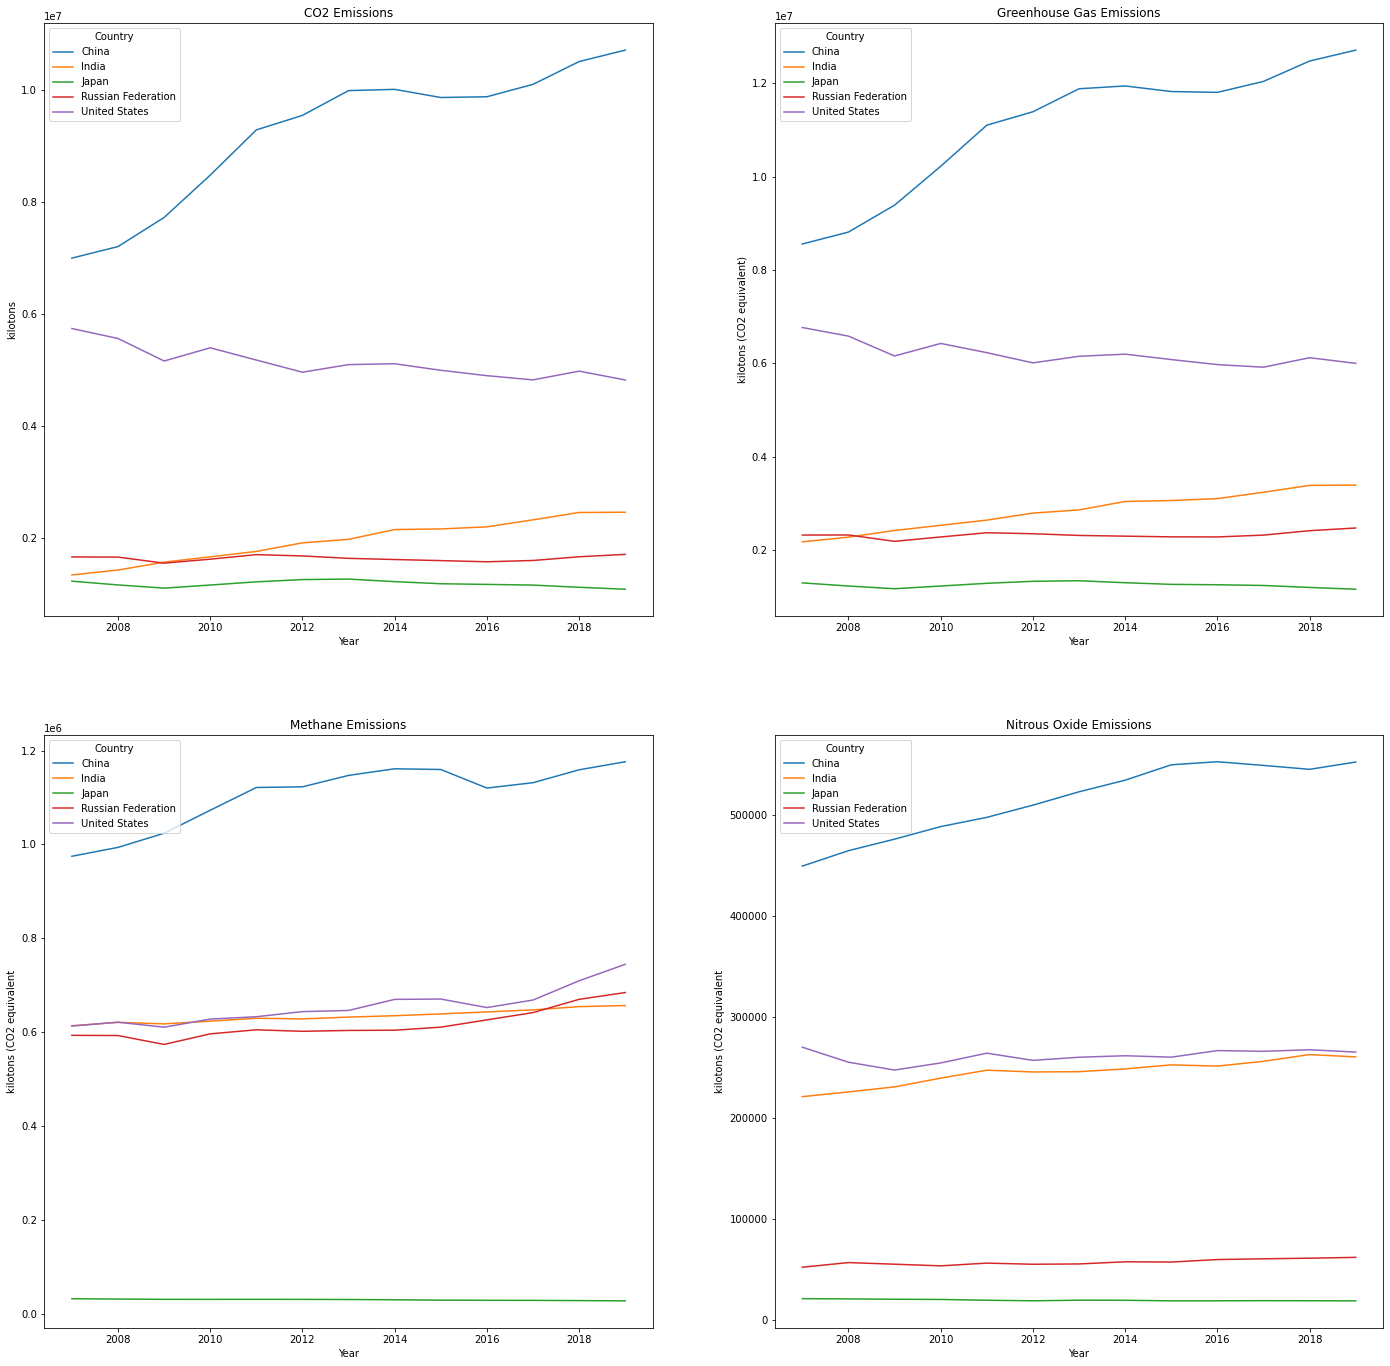

In [55]:
plt.clf()
fig, axes = plt.subplots(2, 2, figsize=(24,24))
axes[0,0].set_ylabel('kilotons')
axes[0,1].set_ylabel('kilotons (CO2 equivalent)')
axes[1,0].set_ylabel('kilotons (CO2 equivalent')
axes[1,1].set_ylabel('kilotons (CO2 equivalent')

axes[0,0].set_title('CO2 Emissions')
axes[0,1].set_title('Greenhouse Gas Emissions')
axes[1,0].set_title('Methane Emissions')
axes[1,1].set_title('Nitrous Oxide Emissions')

sns.lineplot(x='Year', y='EN.ATM.CO2E.KT', data=resdf, hue='Country', ax=axes[0,0])
sns.lineplot(x='Year', y='EN.ATM.GHGT.KT.CE', data=resdf, hue='Country', ax=axes[0,1])
sns.lineplot(x='Year', y='EN.ATM.METH.KT.CE', data=resdf, hue='Country', ax=axes[1,0])
sns.lineplot(x='Year', y='EN.ATM.NOXE.KT.CE', data=resdf, hue='Country', ax=axes[1,1])
plt.show()

We can have to check year on year change on emissions on these countries to have a normalized metric.

In [57]:
co2_change_df = get_yoy_change_df(resdf, 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.KT.CHG')
ghg_change_df = get_yoy_change_df(resdf, 'EN.ATM.GHGT.KT.CE', 'EN.ATM.GHGT.KT.CE.CHG')
meth_change_df = get_yoy_change_df(resdf, 'EN.ATM.METH.KT.CE', 'EN.ATM.METH.KT.CE.CHG')
noxe_change_df = get_yoy_change_df(resdf, 'EN.ATM.NOXE.KT.CE', 'EN.ATM.NOXE.KT.CE.CHG')

<Figure size 432x288 with 0 Axes>

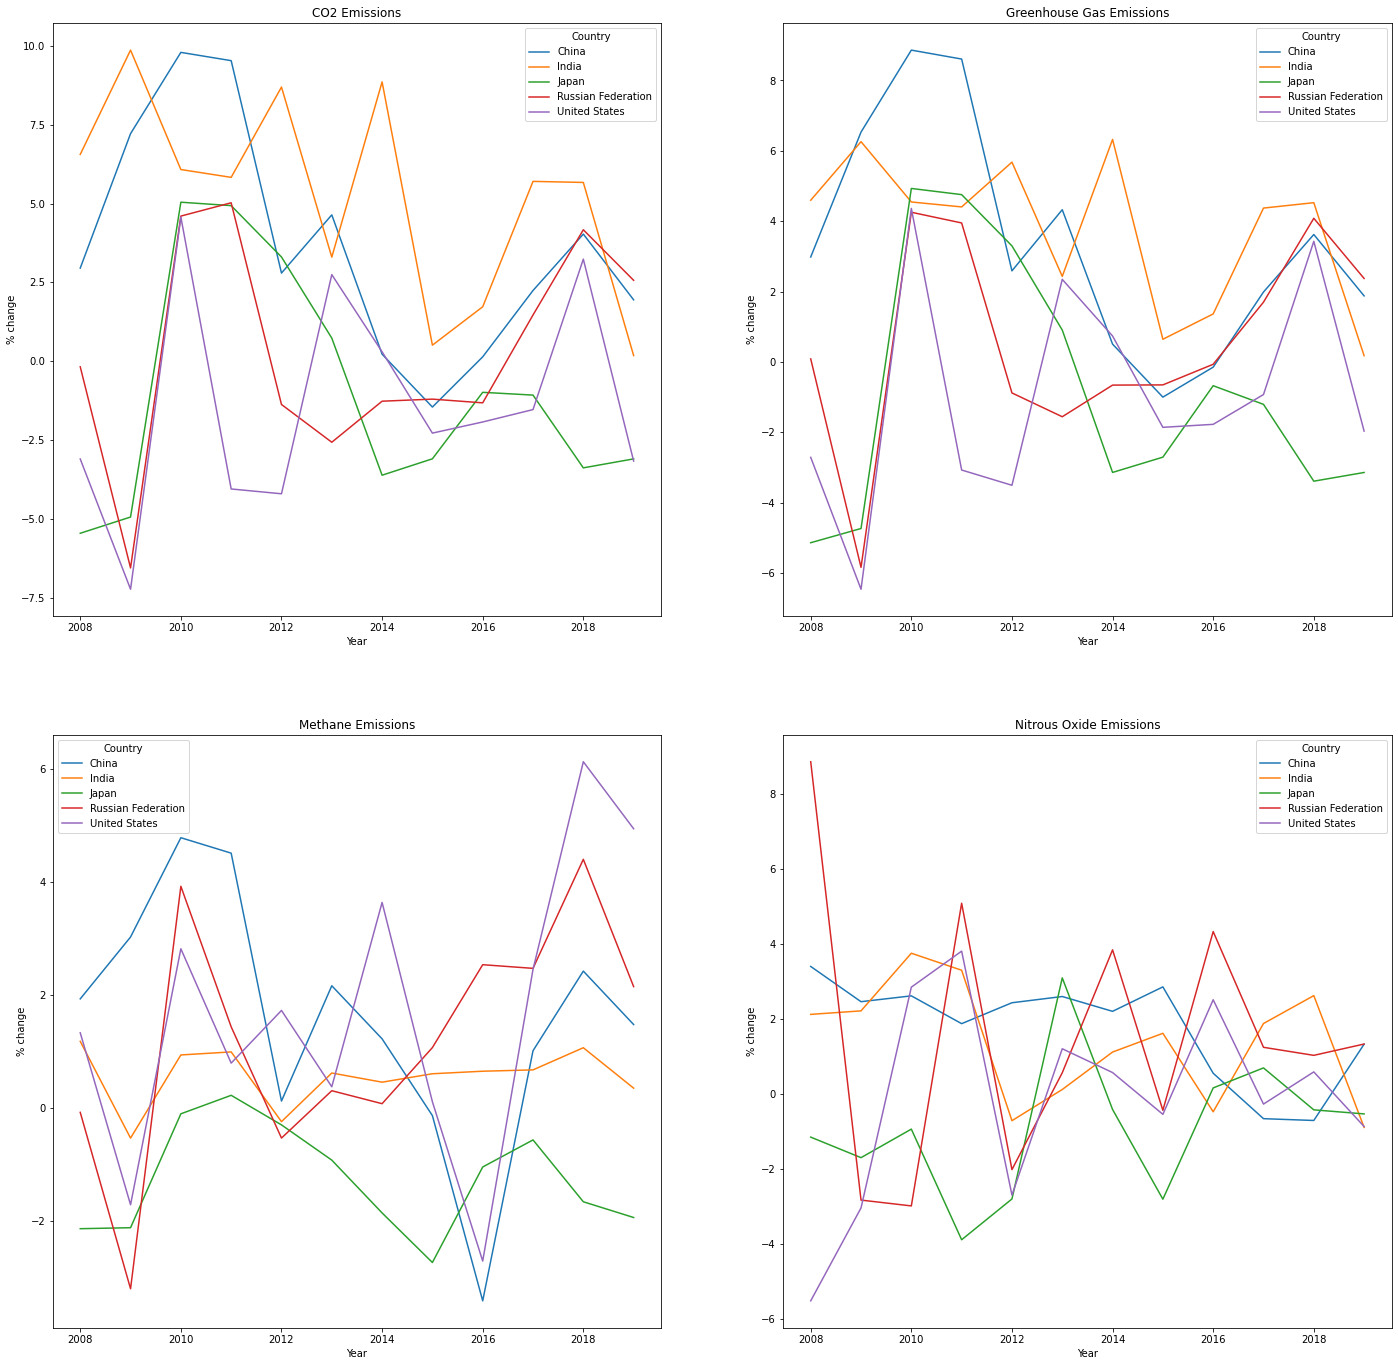

In [58]:
plt.clf()
fig, axes = plt.subplots(2, 2, figsize=(24,24))
axes[0,0].set_ylabel('% change')
axes[0,1].set_ylabel('% change')
axes[1,0].set_ylabel('% change')
axes[1,1].set_ylabel('% change')

axes[0,0].set_title('CO2 Emissions')
axes[0,1].set_title('Greenhouse Gas Emissions')
axes[1,0].set_title('Methane Emissions')
axes[1,1].set_title('Nitrous Oxide Emissions')

sns.lineplot(x='Year', y='EN.ATM.CO2E.KT.CHG', data=co2_change_df, hue='Country', ax=axes[0,0])
sns.lineplot(x='Year', y='EN.ATM.GHGT.KT.CE.CHG', data=ghg_change_df, hue='Country', ax=axes[0,1])
sns.lineplot(x='Year', y='EN.ATM.METH.KT.CE.CHG', data=meth_change_df, hue='Country', ax=axes[1,0])
sns.lineplot(x='Year', y='EN.ATM.NOXE.KT.CE.CHG', data=noxe_change_df, hue='Country', ax=axes[1,1])
plt.show()

<Figure size 432x288 with 0 Axes>

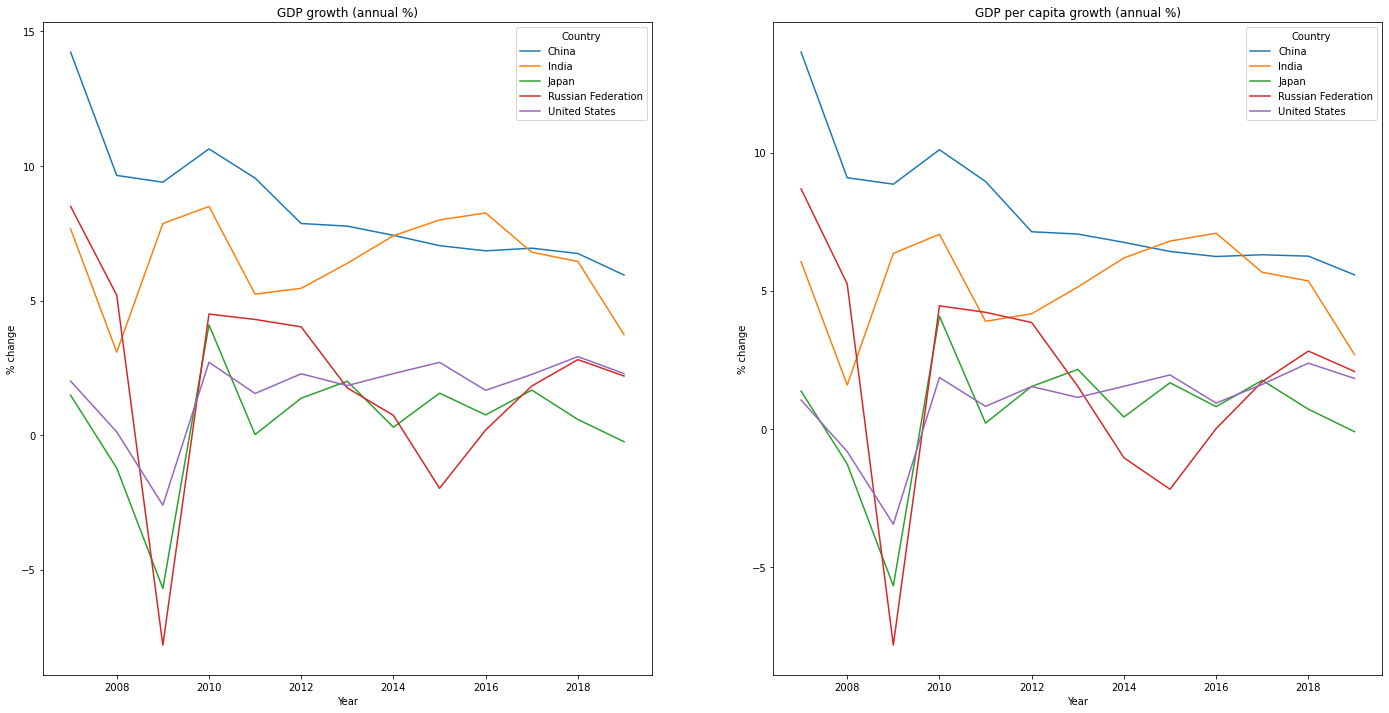

In [9]:
plt.clf()
fig, axes = plt.subplots(1, 2, figsize=(24,12))
axes[0].set_ylabel('% change')
axes[1].set_ylabel('% change')

axes[0].set_title('GDP growth (annual %)')
axes[1].set_title('GDP per capita growth (annual %)')

sns.lineplot(x='Year', y='NY.GDP.MKTP.KD.ZG', data=resdf, hue='Country', ax=axes[0])
sns.lineplot(x='Year', y='NY.GDP.PCAP.KD.ZG', data=resdf, hue='Country', ax=axes[1])
plt.show()

<Figure size 432x288 with 0 Axes>

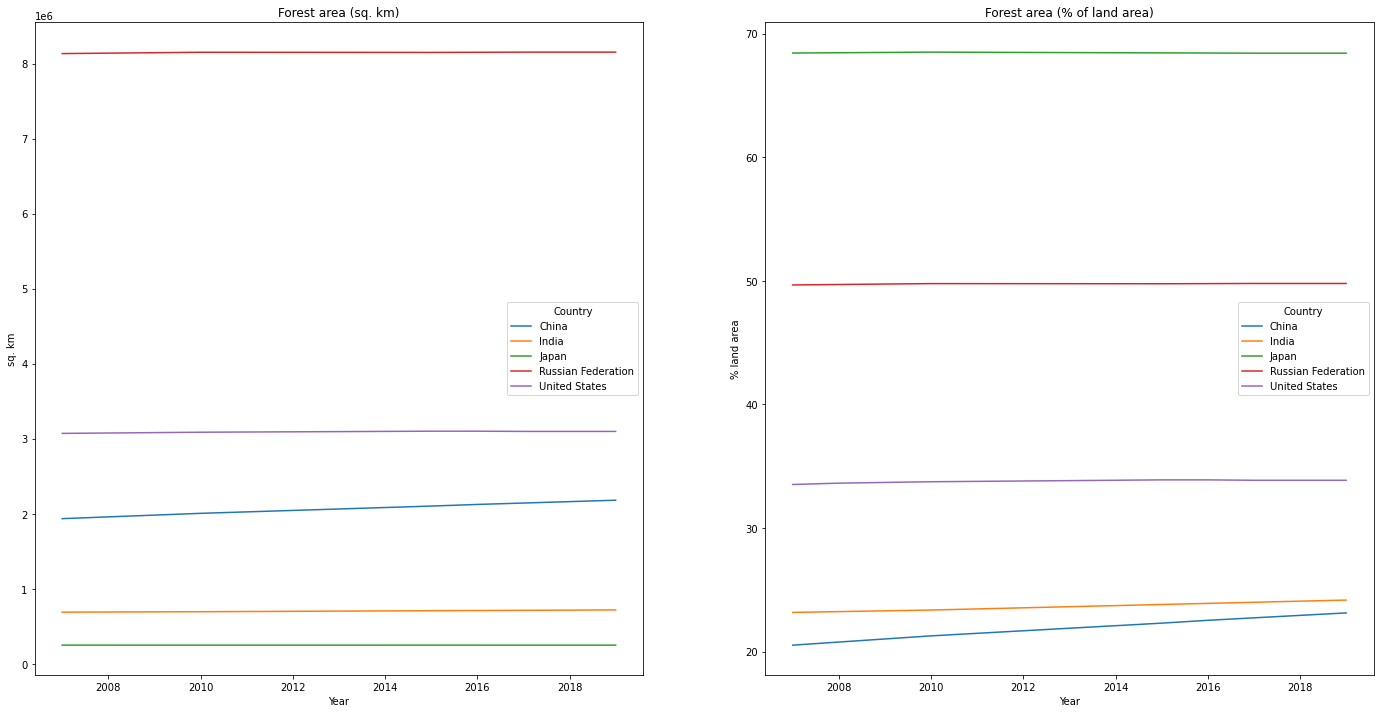

In [10]:
plt.clf()
fig, axes = plt.subplots(1, 2, figsize=(24,12))
axes[0].set_ylabel('sq. km')
axes[1].set_ylabel('% land area')

axes[0].set_title('Forest area (sq. km)')
axes[1].set_title('Forest area (% of land area)')

sns.lineplot(x='Year', y='AG.LND.FRST.K2', data=resdf, hue='Country', ax=axes[0])
sns.lineplot(x='Year', y='AG.LND.FRST.ZS', data=resdf, hue='Country', ax=axes[1])
plt.show()

Try to check the year on year percent change on forest area and % of land area

In [44]:
forest_change_df = get_yoy_change_df(resdf, 'AG.LND.FRST.K2', 'Forest Area % change')

<Figure size 432x288 with 0 Axes>

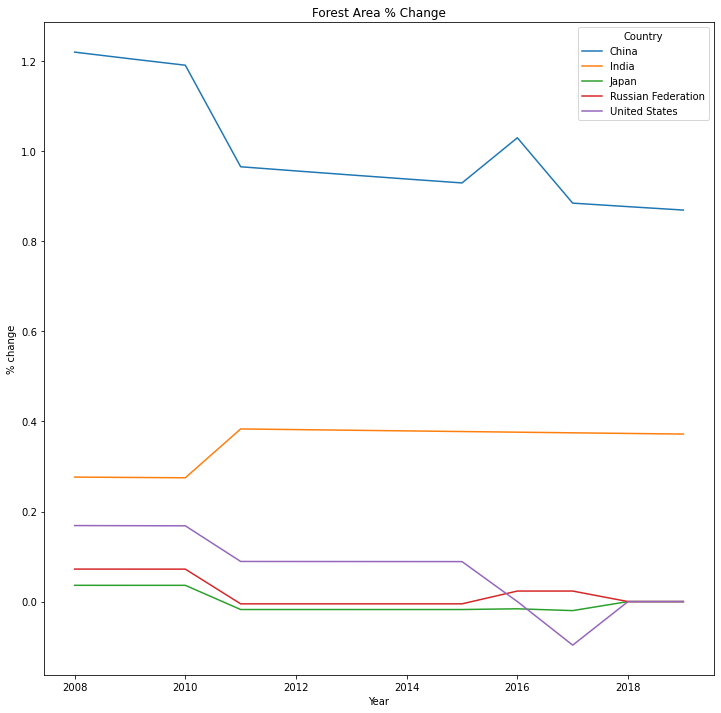

In [47]:
plt.clf()
plt.figure(figsize=(12,12))

plt.title('Forest Area % Change')
plt.ylabel('% change')
sns.lineplot(x='Year', y='Forest Area % change', data=forest_change_df, hue='Country')
plt.show()

<Figure size 432x288 with 0 Axes>

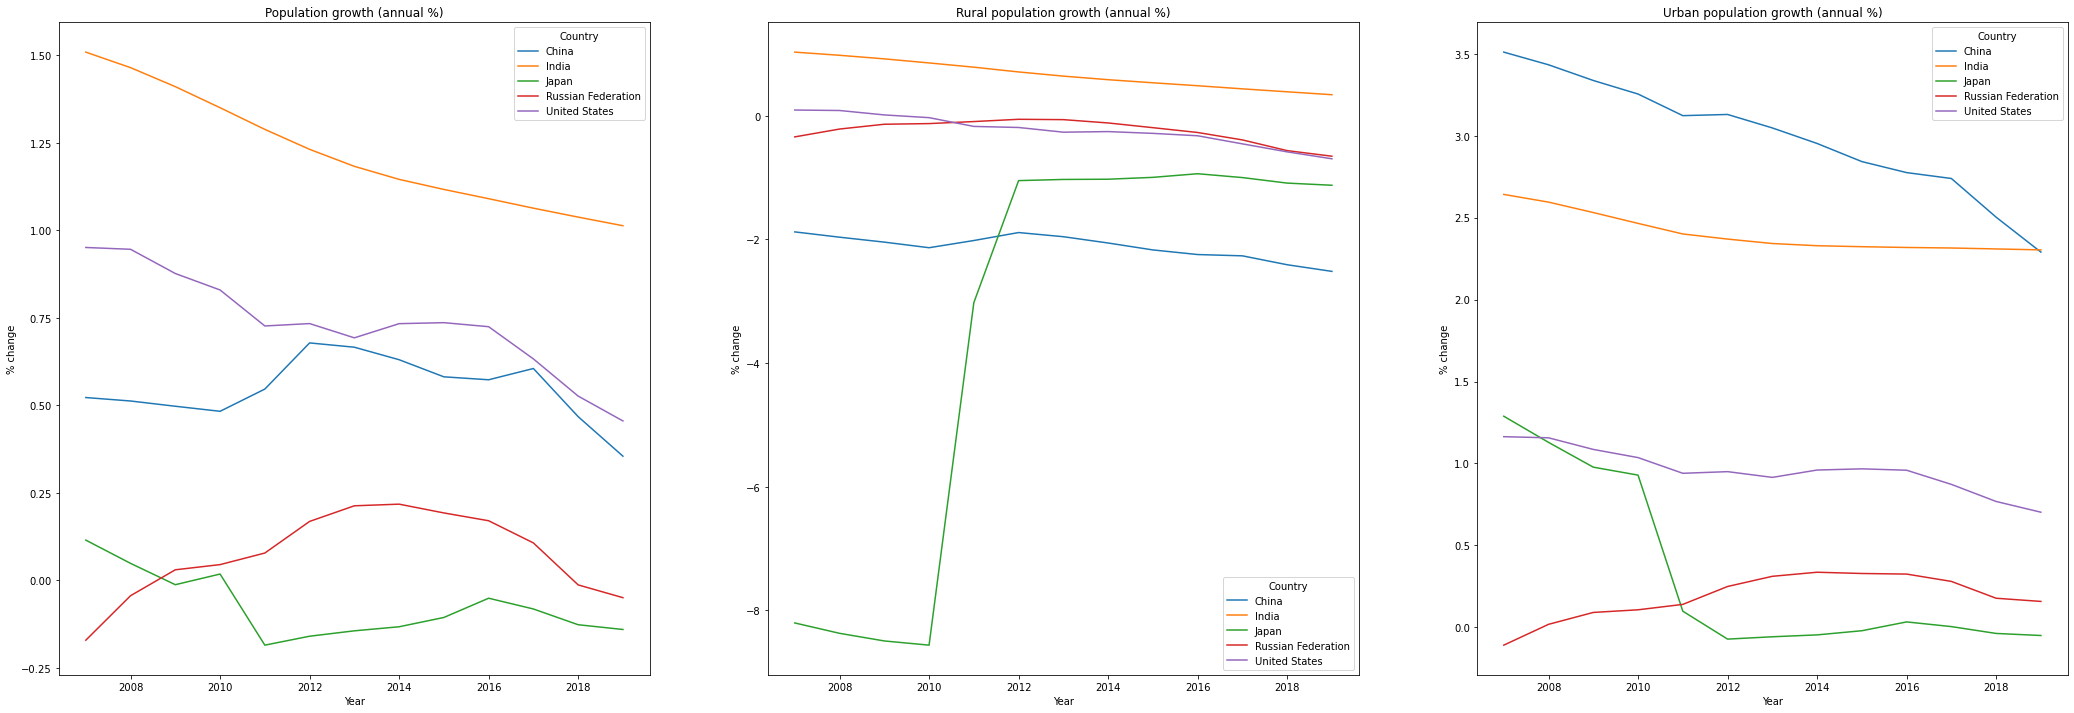

In [29]:
plt.clf()
fig, axes = plt.subplots(1, 3, figsize=(36,12))
axes[0].set_ylabel('% change')
axes[1].set_ylabel('% change')
axes[2].set_ylabel('% change')

axes[0].set_title('Population growth (annual %)')
axes[1].set_title('Rural population growth (annual %)')
axes[2].set_title('Urban population growth (annual %)')

sns.lineplot(x='Year', y='SP.POP.GROW', data=resdf, hue='Country', ax=axes[0])
sns.lineplot(x='Year', y='SP.RUR.TOTL.ZG', data=resdf, hue='Country', ax=axes[1])
sns.lineplot(x='Year', y='SP.URB.GROW', data=resdf, hue='Country', ax=axes[2])

plt.show()